<a href="https://colab.research.google.com/github/maskot1977/Computer_and_Exercises_2021/blob/p6MsWGZT/%E8%AA%B2%E9%A1%8C%EF%BC%98%EF%BC%99%E3%80%9C%EF%BC%99%EF%BC%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課題８９

In [ ]:
!wget https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/location.txt 

--2022-01-06 07:58:24--  https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/location.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1251 (1.2K) [text/plain]
Saving to: ‘location.txt’

location.txt        100%[===================>]   1.22K  --.-KB/s    in 0s      

2022-01-06 07:58:24 (107 MB/s) - ‘location.txt’ saved [1251/1251]



In [ ]:
import pandas as pd
df = pd.read_csv("location.txt", index_col=0)
df

,Longitude,Latitude
Town,,
Sapporo,43.06417,141.34694
Aomori,40.82444,140.74000
Morioka,39.70361,141.15250
Sendai,38.26889,140.87194
Akita,39.71861,140.10250
Yamagata,38.24056,140.36333
Fukushima,37.75000,140.46778
Mito,36.34139,140.44667
Utsunomiya,36.56583,139.88361


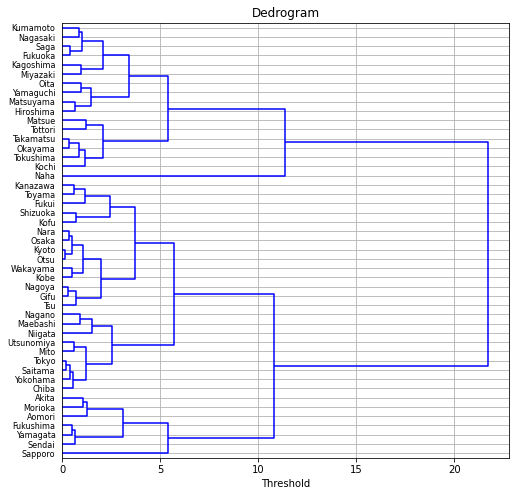

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# metric は色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# method も色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
dend_link = linkage(df,
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  #method = 'average')
                  method= 'complete')
                  #method='weighted')
plt.figure(figsize=(8, 8))
dendrogram(dend_link, orientation='right', labels=list(df.index), color_threshold=0.01)
plt.title("Dedrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

# 課題９１

In [ ]:
# 現在の Google Colab では Sympy 1.1.1 が入っている。
# Sympy 1.1 では後述の「特殊解」が計算できないので、1.3 にアップグレードする。
!pip install sympy==1.3

     |████████████████████████████████| 5.9 MB 13.9 MB/s 
  Created wheel for sympy: filename=sympy-1.3-py3-none-any.whl size=5199966 sha256=acdaa6f05ff280e4a90e5e40264ec14d0120294bc4cd05f7048ac9138a17502b
  Stored in directory: /root/.cache/pip/wheels/68/ed/ab/a672266507280d01d31accd7bec372c26a636956de24e4fd7f
Successfully built sympy
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1


In [ ]:
import sympy as sym
from sympy.plotting import plot
sym.init_printing(use_unicode=True)
%matplotlib inline

In [ ]:
# Google Colab 使用の場合、SympyによるTeX表示をサポートするために実行する
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sym.printing.latex(exp,**options)

sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

In [ ]:
a = sym.Symbol('a')

In [ ]:
a, b, c, x, y = sym.symbols("a b c x y")

In [ ]:
f = sym.Function('f')
g = sym.Function('g')

In [ ]:
# 数式は英語で numerial expression または numerical formula
expr = x**2-12*x+8
expr

 2           
x  - 12⋅x + 8

/usr/local/lib/python3.7/dist-packages/sympy/plotting/plot.py:888: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.7/dist-packages/sympy/plotting/plot.py:889: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


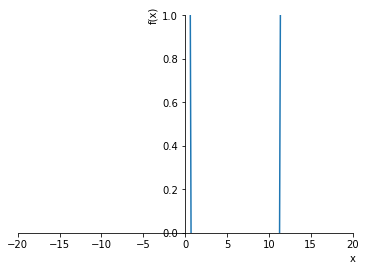

In [ ]:
# 得られた関数を図示
plot(expr, (x, -20, 20))

In [ ]:
# 因数分解
expr = x**2 + 2*x + 1
sym.factor(expr)

       2
(x + 1) 

In [ ]:
# 等式は英語で equation または equality
eq = sym.Eq(expr)
eq

 2              
x  + 2⋅x + 1 = 0

In [ ]:
# 方程式を解く
sym.solve(eq)

[-1]

In [ ]:
# 常微分方程式
eq = sym.Eq(2 * f(x).diff(x,1) + 5 * f(x))
eq

           d           
5⋅f(x) + 2⋅──(f(x)) = 0
           dx          

In [ ]:
# 一般解
ans = sym.dsolve(eq)
print(ans)
ans

Eq(f(x), C1*exp(-5*x/2))


           -5⋅x 
           ─────
             2  
f(x) = C₁⋅ℯ     

In [ ]:
# 特殊解
ans = sym.dsolve(eq, ics={f(0):1})
print(ans)
ans

Eq(f(x), exp(-5*x/2))


        -5⋅x 
        ─────
          2  
f(x) = ℯ     

In [ ]:
# 特殊解で x = 2 のとき
print(ans.subs(x, 2))
ans.subs(x, 2)

Eq(f(2), exp(-5))


        -5
f(2) = ℯ  

In [ ]:
# evalf というメソッドを使えば浮動小数点まで展開してくれる
ans.subs(x, 2).evalf()

f(2) = 0.00673794699908547

In [ ]:
expr = (x-a)*(b-x)
eq = sym.Eq(sym.Integral(expr, (x, a, b)), sym.integrate(expr, (x, a, b))).factor()
print(eq)
eq

Eq(-Integral((-a + x)*(-b + x), (x, a, b)), -(a - b)**3/6)


 b                                3 
 ⌠                        -(a - b)  
-⎮ (-a + x)⋅(-b + x) dx = ──────────
 ⌡                            6     
 a                                  

In [ ]:
expr = x/(x**2 + 1)
eq = sym.Eq(sym.Integral(expr, (x, 1, 2)), sym.integrate(expr, (x, 1, 2)))
print(eq)
eq

Eq(Integral(x/(x**2 + 1), (x, 1, 2)), -log(2)/2 + log(5)/2)


2                              
⌠                              
⎮   x           log(2)   log(5)
⎮ ────── dx = - ────── + ──────
⎮  2              2        2   
⎮ x  + 1                       
⌡                              
1                              

In [ ]:
sym.integrate(expr, (x, 1, 2)).evalf()


0.458145365937078

# 課題９２

In [ ]:
import math

f = lambda x: 4 / (x**2 + 1)

In [ ]:
import scipy.integrate as integrate

result = integrate.quad(f, 0, 1)

In [ ]:
result

(3.1415926535897936, 3.4878684980086326e-14)

# 課題９３

In [ ]:
from scipy import optimize

f = lambda x: math.exp(x) - 3 * x

In [ ]:
optimize.bisect(f, 0, 1)

0.619061286737633

In [ ]:
optimize.newton(f, 0)

0.6190612867359452

# 課題９４

In [ ]:
import numpy as np
f = lambda x: 1/(1 + np.exp(-x))
g = lambda x: 1.0/(1.0+x**2)
h = lambda x: np.sin(x)

x_observed = np.linspace(-10, 10, 11) # 観測点

fx_observed = f(x_observed) # f(x) の観測値
gx_observed = g(x_observed) # g(x) の観測値
hx_observed = h(x_observed) # h(x) の観測値

In [ ]:
from scipy import interpolate

x_latent = np.linspace(-10, 10, 101)

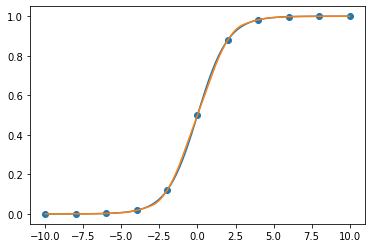

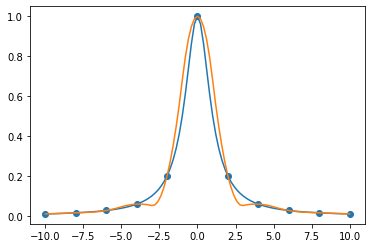

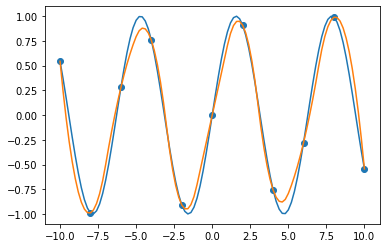

In [ ]:
spline = lambda x, y: interpolate.interp1d(x, y, kind="quadratic")

for function in [f, g, h]:
    plt.scatter(x_observed, function(x_observed))
    plt.plot(x_latent, function(x_latent))

    #y_fit = interpolate.lagrange(x_observed, function(x_observed))
    y_fit = spline(x_observed, function(x_observed))
    plt.plot(x_latent, y_fit(x_latent))
    plt.show()

In [ ]:
x_observed = [9, 28, 38, 58, 88, 98, 108, 118, 128, 138, 148, 158, 168, 178, 188, 198, 208, 218, 228, 238, 278, 288, 298]
y_observed = [51, 80, 112, 294, 286, 110, 59, 70, 56, 70, 104, 59, 59, 72, 87, 99, 64, 60, 74, 151, 157, 57, 83]

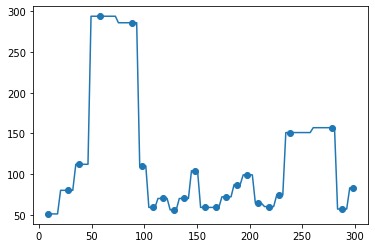

In [ ]:
x_latent = np.linspace(min(x_observed), max(x_observed), 101)

# spline = lambda x, y: interpolate.interp1d(x, y, kind="quadratic")
nearest = lambda x, y: interpolate.interp1d(x, y, kind="nearest")

plt.scatter(x_observed, y_observed)

f1 = interpolate.lagrange(x_observed, y_observed) # ラグランジュ補間

spline = lambda x, y: interpolate.interp1d(x, y, kind="quadratic")
f2 = spline(x_observed, y_observed) # スプライン補間

f3 = nearest(x_observed, y_observed) # 最近傍

plt.plot(x_latent, f3(x_latent))

# 課題９５

In [ ]:
import numpy as np
f = lambda x: 1/(1 + np.exp(-x))
g = lambda x: 1.0/(1.0+x**2)
h = lambda x: np.sin(x)

x_observed = np.linspace(-10, 10, 11) # 観測点

fx_observed = f(x_observed) # f(x) の観測値
gx_observed = g(x_observed) # g(x) の観測値
hx_observed = h(x_observed) # h(x) の観測値

x_latent = np.linspace(-10, 10, 101)

In [ ]:
import numpy as np

n = 3
coefficients = np.polyfit(x_observed, fx_observed, n)
coefficients

array([-7.46038675e-04,  2.50901863e-18,  1.19807394e-01,  5.00000000e-01])

In [ ]:
y_fit = np.poly1d(coefficients)

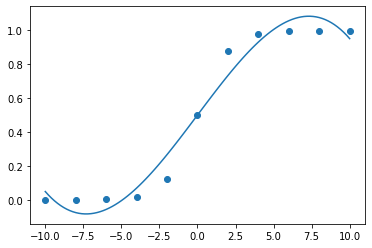

In [ ]:
plt.scatter(x_observed, fx_observed)
plt.plot(x_latent, y_fit(x_latent))

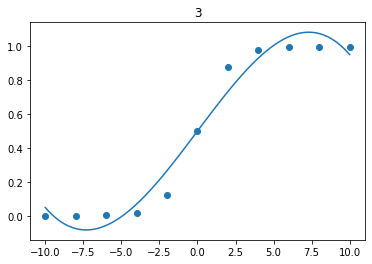

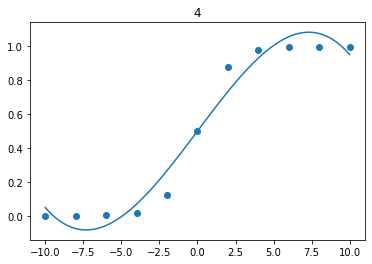

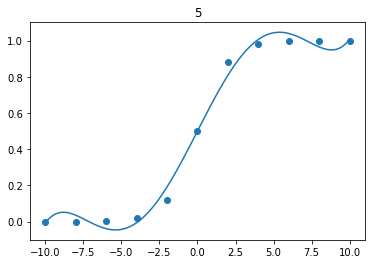

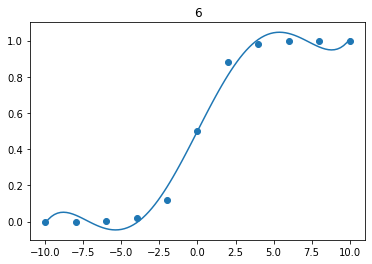

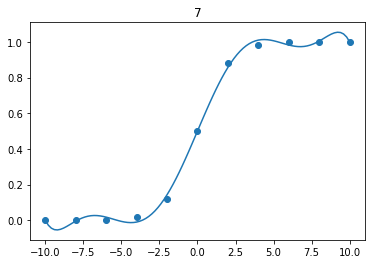

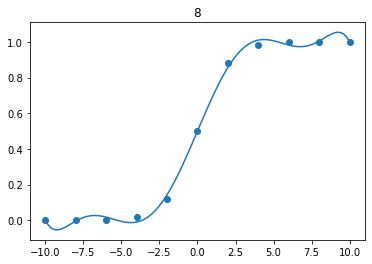

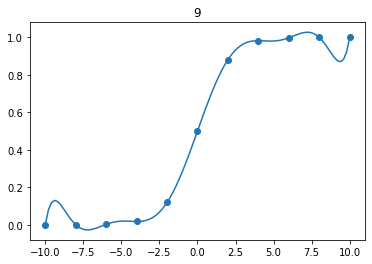

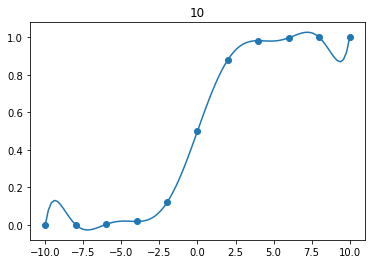

In [ ]:
for n in range(3, 11):
    coefficients = np.polyfit(x_observed, fx_observed, n)
    y_fit = np.poly1d(coefficients)
    plt.scatter(x_observed, fx_observed)
    plt.plot(x_latent, y_fit(x_latent))
    plt.title(n)
    plt.show()

In [ ]:
x_observed = [9, 28, 38, 58, 88, 98, 108, 118, 128, 138, 148, 158, 168, 178, 188, 198, 208, 218, 228, 238, 278, 288, 298]
y_observed = [51, 80, 112, 294, 286, 110, 59, 70, 56, 70, 104, 59, 59, 72, 87, 99, 64, 60, 74, 151, 157, 57, 83]

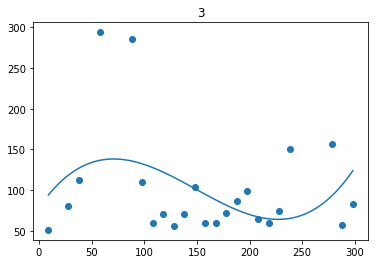

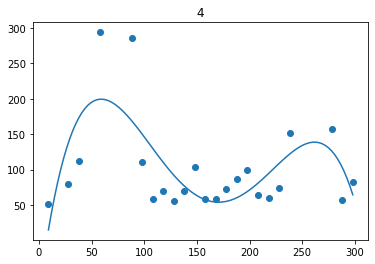

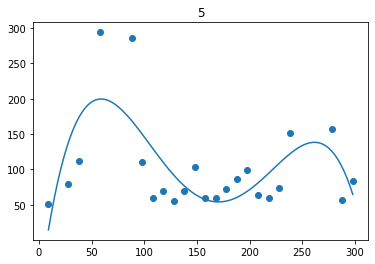

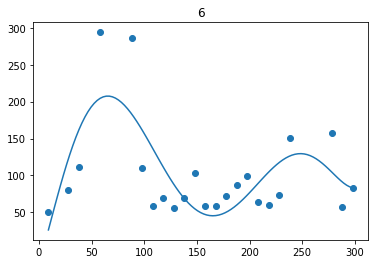

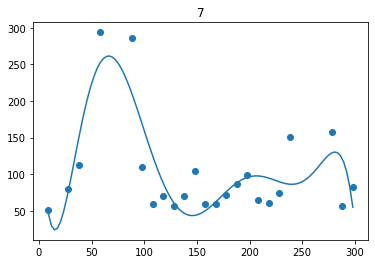

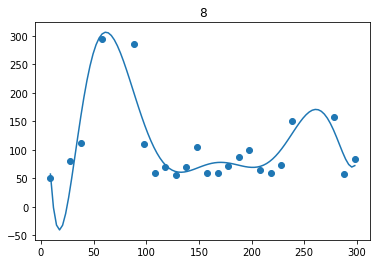

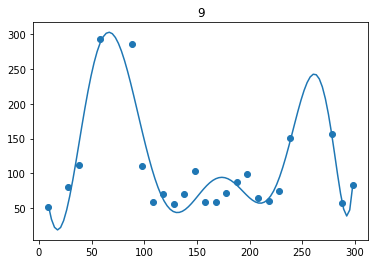

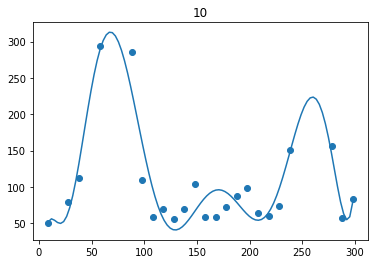

In [ ]:
x_latent = np.linspace(min(x_observed), max(x_observed), 101)

for n in range(3, 11):
    coefficients = np.polyfit(x_observed, y_observed, n)
    y_fit = np.poly1d(coefficients)
    plt.scatter(x_observed, y_observed)
    plt.plot(x_latent, y_fit(x_latent))
    plt.title(n)
    plt.show()

# 課題９６

In [ ]:
X1 = [4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 
      3.5, 4.2, 4.0, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 
      4.8, 4.0, 4.9, 4.7, 4.3, 4.4, 4.8, 5.0, 4.5, 3.5, 
      3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4.0, 
      4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1, 
      6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 
      5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 
      5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 
      6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 
      5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]

Y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

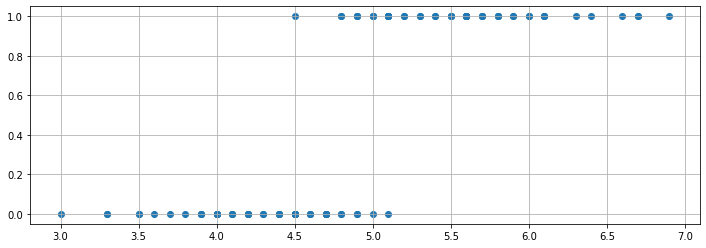

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.scatter(X1, Y)
plt.grid()
plt.show()

In [ ]:
# Python の List を Numpy の Array に変換しておきましょう。
import numpy as np
X1 = np.array(X1)
Y = np.array(Y)

In [ ]:
import numpy as np
def func1(X, a, b): # シグモイド曲線
    f = a + b * X
    return 1. / (1. + np.exp(-f))

In [ ]:
func1(X1, 1, 1)

array([0.99666519, 0.99592986, 0.99726804, 0.99330715, 0.99631576,
       0.99592986, 0.99666519, 0.98661308, 0.99631576, 0.99260846,
       0.98901306, 0.9945137 , 0.99330715, 0.99666519, 0.9900482 ,
       0.99550373, 0.99592986, 0.9939402 , 0.99592986, 0.99260846,
       0.99698158, 0.99330715, 0.99726804, 0.99666519, 0.9950332 ,
       0.99550373, 0.99698158, 0.99752738, 0.99592986, 0.98901306,
       0.99183743, 0.9909867 , 0.99260846, 0.99776215, 0.99592986,
       0.99592986, 0.99666519, 0.99550373, 0.9939402 , 0.99330715,
       0.99550373, 0.99631576, 0.99330715, 0.98661308, 0.9945137 ,
       0.9945137 , 0.9945137 , 0.9950332 , 0.98201379, 0.9939402 ,
       0.99908895, 0.99776215, 0.99899323, 0.99864148, 0.99888746,
       0.9994998 , 0.99592986, 0.99932492, 0.99888746, 0.99917558,
       0.99776215, 0.99816706, 0.99849882, 0.99752738, 0.99776215,
       0.99816706, 0.99849882, 0.99954738, 0.99962939, 0.99752738,
       0.9987706 , 0.99726804, 0.99954738, 0.99726804, 0.99877

In [ ]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func1,X1,Y) # poptは最適推定値、pcovは共分散
popt

array([-47.16056569,   9.6947444 ])

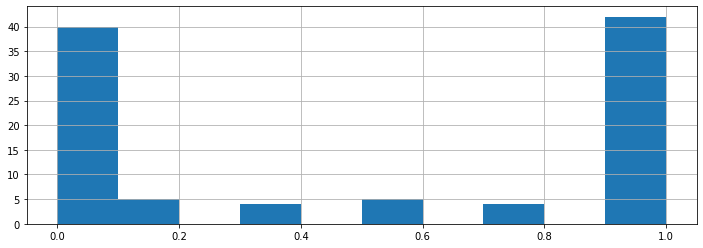

In [ ]:
plt.figure(figsize=(12,4))
plt.hist(func1(X1, -47.16056569,   9.6947444))
plt.grid()
plt.show()

In [ ]:
X2 = [1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 
      1.0, 1.5, 1.0, 1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1, 
      1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.0, 
      1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 
      1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 
      2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 
      2.0, 1.9, 2.1, 2.0, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 
      2.3, 2.0, 2.0, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 
      1.9, 2.0, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 
      2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8]

X = np.array([X1, X2])

In [ ]:
X[1]

array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
       1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
       1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
       1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9,
       2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4,
       2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8,
       2.1, 1.6, 1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4,
       2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [ ]:
import numpy as np
def func2(X, a, b, c): # シグモイド曲線
    f = a + b * X[0] + c * X[1]
    return 1. / (1. + np.exp(-f))

In [ ]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func2,X,Y) # poptは最適推定値、pcovは共分散
popt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


array([-34.73855708,   4.53539757,   7.68378878])

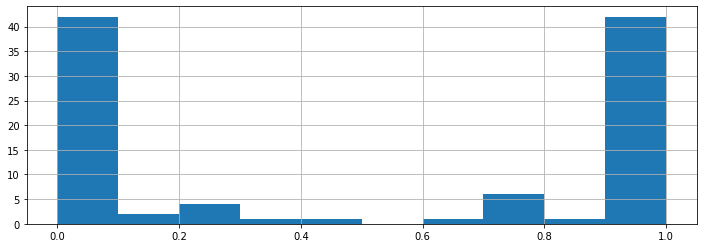

In [ ]:
plt.figure(figsize=(12,4))
plt.hist(func2(X, -34.73855708,   4.53539757,   7.68378878))
plt.grid()
plt.show()

In [ ]:
X3 = [7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 
      5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 
      5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 
      5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 
      5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 
      6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 
      6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 
      6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 
      7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 
      6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]

X4 = [3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 
      2.0, 3.0, 2.2, 2.9, 2.9, 3.1, 3.0, 2.7, 2.2, 2.5, 
      3.2, 2.8, 2.5, 2.8, 2.9, 3.0, 2.8, 3.0, 2.9, 2.6, 
      2.4, 2.4, 2.7, 2.7, 3.0, 3.4, 3.1, 2.3, 3.0, 2.5, 
      2.6, 3.0, 2.6, 2.3, 2.7, 3.0, 2.9, 2.9, 2.5, 2.8, 
      3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, 3.6, 
      3.2, 2.7, 3.0, 2.5, 2.8, 3.2, 3.0, 3.8, 2.6, 2.2, 
      3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3.0, 2.8, 3.0, 
      2.8, 3.8, 2.8, 2.8, 2.6, 3.0, 3.4, 3.1, 3.0, 3.1, 
      3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0]

X = np.array([X1, X2, X3, X4])

In [ ]:
import numpy as np
def func(X, *params):
    f = np.zeros_like(X[0])
    for i, param in enumerate(params):
        if i == 0:
            f = f + param
        else:
            f = f + np.array(param * X[i - 1])
    return 1. / (1. + np.exp(-f))

In [ ]:
import numpy as np

np.random.rand(3)

array([0.30589653, 0.09173544, 0.24864235])

In [ ]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func, X, Y, p0=np.random.rand(1)) # poptは最適推定値、pcovは共分散
popt

array([-1.05883289e-08])

In [ ]:
# 左１つの説明変数を使った近似
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func, X, Y, p0=np.random.rand(2)) # poptは最適推定値、pcovは共分散
popt

array([-47.16071578,   9.69477584])

In [ ]:
# 左２つの説明変数を使った近似
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func, X, Y, p0=np.random.rand(3)) # poptは最適推定値、pcovは共分散
popt

array([-34.73591942,   4.53511052,   7.6830464 ])

In [ ]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func, X, Y, p0=np.random.rand(4)) # poptは最適推定値、pcovは共分散
popt

array([-469.49119458,  153.08766201,  125.42408601,  -77.56043653])

In [ ]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func, X, Y, p0=np.random.rand(5)) # poptは最適推定値、pcovは共分散
popt

array([-1299.60158074,   330.23334466,   348.41621738,   -77.37997084,
        -145.91550124])